In [1]:
#A continuación importamos las librerias que utilizaremos. 
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.core.display import Image
from mpl_toolkits.mplot3d.axes3d import *
from IPython.display import display, Latex
from matplotlib import cm
from IPython.display import clear_output
#from tqdm import tqdm
from scipy import integrate
from scipy.optimize import curve_fit
import time
import math
from decimal import Decimal
from tqdm import tqdm
from matplotlib.animation import FuncAnimation 

# Taller 3: Métodos Computacionales
### Estudiantes: Andrés Hernández (201329363)    Francisco Díaz (201912252)

## 1. Colisión de cuerpos rígidos
**1.d)** Definiendo $M = \frac{m_1}{m_2}= 1.5$, $I = kmr^2$ con $k = 1/2$ para un disco, $r_1 = 0.1 \; cm$, $r_2 = 0.2 \; cm$, el coeficiente de restitución parcialmente elástico $(e= 0.8)$, y $\vec{u_{1}} = 2$ m/s $\hat{i} $. Variar el ángulo $(0 < \theta < \pi / 2)$ de incidencia para describir algunos estados finales después del choque:

In [10]:
#Definimos la función que resolvera el sistema de ecuaciones para encontrar la descripción del estado final del sistema

def GetFinalState(theta, M, k, e, u1):
    
    A = np.array([[np.sin(theta),np.cos(theta),-np.sin(theta),-np.cos(theta),1,1],
              [0, M, 0, 1, 0, 0],
              [M, 0, 1, 0, 0, 0],
              [-np.cos(theta),np.sin(theta),np.cos(theta),-np.sin(theta),0,0],
              [np.sin(theta),np.cos(theta), 0, 0, -k, 0],
              [0, 0, np.sin(theta), np.cos(theta), 0, k]], dtype='float')
    b = np.array ([0, 0, M*u1, e*u1*np.cos(theta), u1*np.sin(theta),0])
    
    FinalState = np.linalg.solve(A,b)
    
    return FinalState

# Definimos las constantes para nuestro caso particular 

M, k = 1.5, 0.5
r1, r2 = 0.001, 0.002
e, u1 = 0.8, 2
# Generamos el estado final del sistema para distintos valores del ángulo de incidencia

Theta = np.linspace(0, np.pi/2, 50, endpoint = False)
Sol = []
for i in Theta:
    newSol = GetFinalState( i, M, k, e, u1)
    newSol[4], newSol[5] = newSol[4]/r1 , newSol[5]/r2
    Sol.append(newSol)
Sol = np.array(Sol)

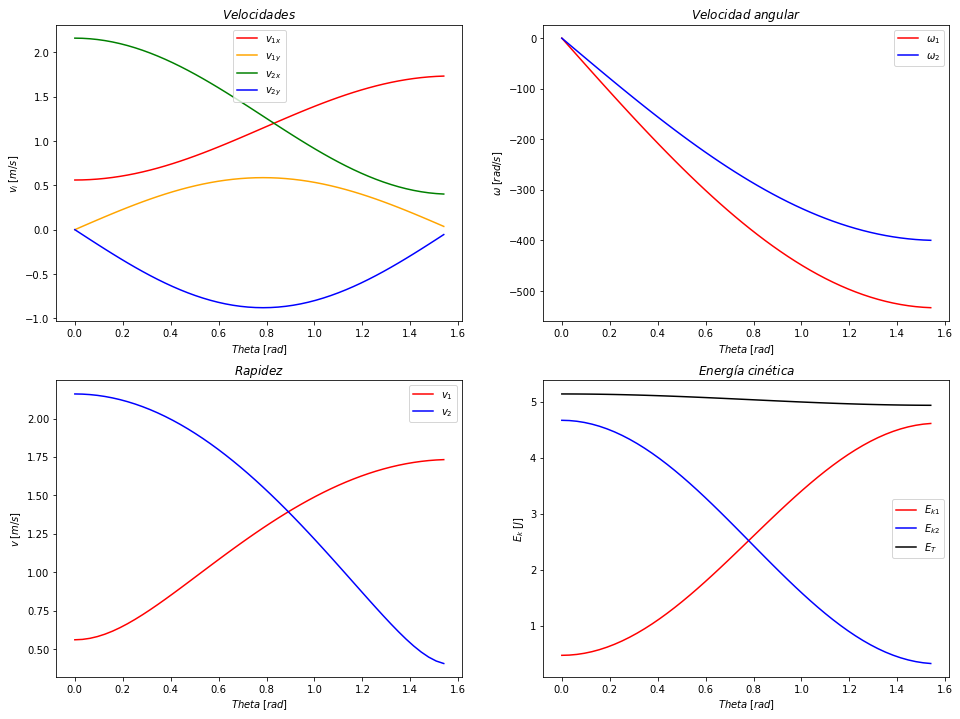

In [11]:
# Graficamos las variables que describen el estado final

fig = plt.figure(figsize =  (16, 12))

ax1= fig.add_subplot(2,2,1)
ax1.set_xlabel("$ Theta \; [rad]$")
ax1.set_ylabel("$v_{i} \; [m/s]$")
ax1.set_title("$Velocidades$")
ax1.plot(Theta, Sol[:,0], label = r"$v_{1x}$", c = 'r')
ax1.plot(Theta, Sol[:,1], label = r"$v_{1y}$", c = 'orange')
ax1.plot(Theta, Sol[:,2], label = r"$v_{2x}$", c = 'g')
ax1.plot(Theta, Sol[:,3], label = r"$v_{2y}$", c = 'b')
ax1.legend( loc = 'best')

ax2= fig.add_subplot(2,2,2)
ax2.set_xlabel("$Theta \; [rad]$")
ax2.set_ylabel("$\omega \; [rad/s]$")
ax2.set_title("$Velocidad \; angular$")
ax2.plot(Theta, Sol[:,4], label = r"$\omega_{1}$" , c = 'r')
ax2.plot(Theta, Sol[:,5], label = r"$\omega_{2}$", c = 'b')
ax2.legend( loc = 'best')

ax3 = fig.add_subplot(2,2,3)
ax3.set_xlabel("$Theta \; [rad]$")
ax3.set_ylabel("$v \; [m/s]$")
ax3.set_title("$Rapidez$")
ax3.plot(Theta, np.sqrt(Sol[:,0]**2  + Sol[:,1]**2 ), label = r"$v_{1}$", c = 'r')
ax3.plot(Theta, np.sqrt(Sol[:,2]**2  + Sol[:,3]**2 ), label = r"$v_{2}$", c = 'b')
ax3.legend( loc = 'best')


V1 = np.sqrt(Sol[:,0]**2  + Sol[:,1]**2 )
V2 = np.sqrt(Sol[:,2]**2  + Sol[:,3]**2 )
K1 = (3/2)*(V1**2)
K2 = (2/2)*(V2**2)
K1 += ((k*(3/2)*(r1**2))/2)*(Sol[:,4]**2)
K2 += ((k*(2/2)*(r2**2))/2)*(Sol[:,5]**2)

ax4 = fig.add_subplot(2,2,4)
ax4.set_xlabel("$Theta \; [rad]$")
ax4.set_ylabel("$E_{k} \; [J]$")
ax4.set_title("$Energía \; cinética$")
ax4.plot(Theta, K1, label = r"$E_{k1}$", c = 'r')
ax4.plot(Theta, K2, label = r"$E_{k2}$", c = 'b')
ax4.plot(Theta, K1+K2, label = r"$E_{T}$", c = 'k')
ax4.legend( loc = 'best')

plt.show()

## 2. Precesión de la órbita de Mercurio

In [4]:
# Importamos los datos generados por la simulación en c++

file = 'Orbitas/data/Perihelio.dat'
rawData = np.loadtxt(file, dtype = 'str')
Data = []
for i in rawData:
    Data.append([Decimal(i[0]), Decimal(i[1]), Decimal(i[2])])
        
Data = np.array(Data)

OSError: Orbitas/data/Perihelio.dat not found.

In [ ]:
# Realizamos un ajuste lineal para encontrar el valor del ángulo de precesión y graficamos

def f(x, m,b ):
    return m*x +b 

popt, pcov = curve_fit(f, Data[:,0]*2, Data[:,2]*2)
omega = np.around(popt[0]*(3600)*(100), 6)

t = np.linspace(0, float(np.amax(Data[:,0]*2)), 200)
y = f(t, popt[0], popt[1])

fig = plt.figure(figsize =  (12, 8))
ax = plt.axes()
ax.set_xlabel(r"$Time [años]$", size = 12)
ax.set_ylabel(r"$\Delta \; \theta \; [^\circ]$", size = 12)
ax.set_title("Desplazamiento del perihelio", size = 14)
plt.scatter(Data[:,0]*2, Data[:,2]*2, color = 'r', label = r"$Datos$")
plt.plot(t,y, color = 'k', label=r"$\Omega ="+str(omega)+" \; Arcseconds / Century$")
plt.legend(loc = 'best')

## 3. Tensor de Inercia de una estrella naciente

Para un sistema de $N$ partículas con masa $m_k$ y posiciones $r_k$, el tensor de inercia se define como:
$$
I = \sum_{k=1}^{N}m_{k}((r_{k} \cdot r_{k} ) E - r_{k}\otimes r_{k} ) 
$$

**a)** Muestre que el tensor de inercia para esta estrella está dado por:

$$
 I = \begin{pmatrix}
 1.1163 \times 10 ^{4} &  2.0524 \times 10^{0}  & 7.4286 \times 10^{-1}  \\ 
 2.0524 \times 10^{0} & 8.9520 \times 10^3 &  −2.3483 \times 10^3  \\ 
7.4286 \times 10^{-1}    & −2.3483 \times 10^3 & 4.2341 \times 10^3 
\end{pmatrix}
$$


In [12]:
#Primero importamos los datos del archivo CuerposCelestes.dat

file_ = 'data/CuerposCelestes.dat'
r = np.loadtxt(file_, comments='#')
X = r[:,0]
Y = r[:,1]
Z = r[:,2]

In [13]:
# Definimos las funciones que utilizaremos para el tensor de inercia

def KroneckerProd(v,w):
    MProd = np.ones((len(v), len(w)))
    for i in range(len(v)):
        for j in range(len(w)):
            MProd[i,j] = v[i]*w[j]
    return MProd

def InerciaTensor(m , r):
    E = np.identity(len(r[0]))
    I = np.zeros((len(r[0]), len(r[0])))
    for k in range(len(m)):
        I += m[k]* ((np.dot(r[k], r[k].T)*E)-KroneckerProd(r[k], r[k]))
    return I

# Generamos e imprimimos el tensor de inercia de la estrella naciente

M = np.ones(len(r))
I = InerciaTensor(M , r)
print(I)

[[ 1.11638178e+04  2.05248547e+00  7.42865762e-01]
 [ 2.05248547e+00  8.95207032e+03 -2.34834623e+03]
 [ 7.42865762e-01 -2.34834623e+03  4.23411270e+03]]


**b)** Encuentre los auto-valores y auto-vectores. Si dos valores propios son cercanos o iguales ¿Qué interpretación tienen los auto-valores respecto a las simetrías de este sistema?

In [14]:
# Encontramos los valores y vectores propios del sistem

eigenValues, eigenVectors = np.linalg.eig(I)
for i in range(len(eigenValues)):
    display(Latex(r'$\lambda_{'+str(i+1)+ '} = '+ str(eigenValues[i])+' $'))
for i in range(len(eigenValues)):
    display(Latex(r'$v_{'+str(i+1)+ '} = ('+str(eigenVectors[i][0])+', \; \; \;' +str(eigenVectors[i][1])+',\; \; \;' +str(eigenVectors[i][2])+')$ '))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

**c)** Haga una gráfica en 3D de las estrella, los eigenvectores de la estrella y la estrella sobre sus ejes principales.

Primero calculamos la matriz de rotación $T$ asociada la transformación de cambio de base entre $B = \{v_{1}, v_{2}, v_{3} \}$ y $B' =  \{ e_{1}, e_{2}, e_{3} \}$ donde $B$ es la base correspondiente a los ejes principales del cuerpo (eigenvectores ya calculados) y $B'$ es la base canónica. Por definición, esta matríz está dada por:
$$
 T = \begin{pmatrix}
e_{1} \cdot v_{1} & e_{1} \cdot v_{2} & e_{1} \cdot v_{3} \\ 
e_{2} \cdot v_{1} & e_{2} \cdot v_{2} & e_{2} \cdot v_{3} \\ 
e_{3} \cdot v_{1} & e_{3} \cdot v_{2} & e_{3} \cdot v_{3}
\end{pmatrix}
$$


In [15]:
# Generamos nuestra matriz de cambio de base

Base1 = [[1, 0, 0], [0, 1, 0],  [0, 0 , 1]]
T = np.zeros((3,3))
for i in range(len(T)):
    for j in range(len(T)):
        T[i,j] = np.dot(eigenVectors[j], Base1[i])
print(T)

[[ 9.99999139e-01  1.27176354e-03 -3.23776435e-04]
 [ 1.29907114e-03 -9.24310243e-01  3.81639736e-01]
 [-1.86085626e-04  3.81639828e-01  9.24311099e-01]]


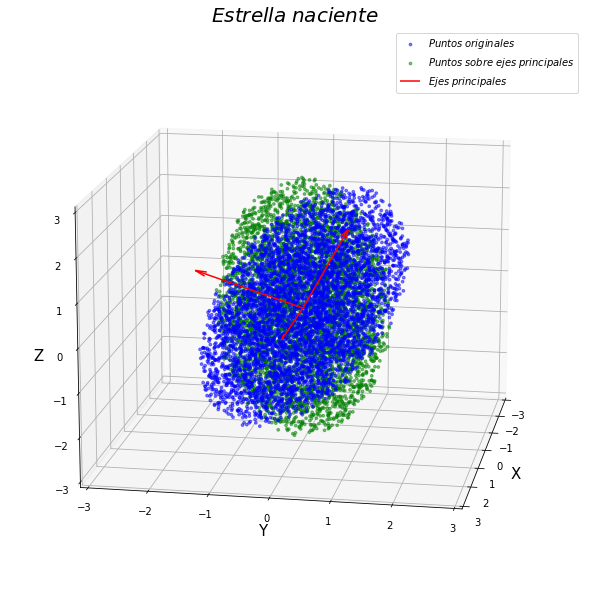

In [16]:
#Realizzmos los cambios de base y graficamos

rNewAxes = np.dot(T, r.T)

soa = np.array([[0, 0, 0, eigenVectors[0][0], eigenVectors[0][1],eigenVectors[0][2]], 
                [0, 0, 0, eigenVectors[1][0], eigenVectors[1][1],eigenVectors[1][2]],
                [0, 0, 0, eigenVectors[2][0], eigenVectors[2][1],eigenVectors[2][2]],])

O1, O2, O3 , U, V, W = zip(*soa)
fs = 15

fig = plt.figure( figsize = (10, 8))
ax = Axes3D(fig, elev = 15, azim = 10)
ax.scatter(X, Y, Z, color = 'b', marker='.', s = 30, alpha = 0.5, label=r'$Puntos\; originales$')
ax.scatter(rNewAxes[0], rNewAxes[1], rNewAxes[2], color = 'g', marker='.', s = 30, alpha = 0.5, label=r'$Puntos \; sobre \;ejes \;principales$')
ax.quiver(O1, O2, O3, U, V, W, color = 'r', pivot='tail',length= 2,arrow_length_ratio=0.1, label = r'$Ejes \;principales$')
ax.set_title(r'$Estrella \; naciente$', fontsize = fs+5)
ax.set_xlabel('X', fontsize = fs)
ax.set_ylabel('Y', fontsize = fs)
ax.set_zlabel('Z', fontsize = fs)
ax.set_xlim(-3.,3.)
ax.set_ylim(-3.,3.)
ax.set_zlim(-3.,3.)
ax.legend(loc='best')
plt.show()

## 4. Series de Fourier
**Aplicación numérica**: Usar la serie de Fourier de $f(t) = t^2$ en el intervalo $ −π \leq  t \leq π$ y $f(t+ 2\pi ) = f(t)$. Para estimar numéricamente (Usando Python y la identidad de Parseval) la suma:
$$
\sum_{n = 1}^{\infty} \frac{1}{n^6} = \frac{\pi ^6}{945}
$$

Analíticamente encontramos que la expansión en series de Fourirer de la función $f(t)$ está dada por:
$$
f(t) = \frac{\pi^{2}}{3} +\sum_{n = 1}^{\infty} \frac{4}{n^2}(-1)^n \cos(nx)
$$

Por otro lado, si estudiamos la serie de Fourirer de la función $h(t)= t^3$ encontramos analíticamente que:
$$
h(t) =\sum_{n = 1}^{\infty} (-1) ^n \left [ \frac{12}{n^3} - \frac{2 \pi ^2 }{n} \right ] \sin(nx)
$$
Así, utilizando la identidad de Parseval para esta serie de Fourier encontramos que: 
\begin{align*}
\frac{2}{T} \int_{-T/2}^{T/2} |h(t)|^2 dt &= \frac{a_{0}^{2}}{2} + \sum_{n = 1}^{\infty} (a_{n} ^{2} + b_{n}^{2}) \\
\frac{1}{\pi} \int_{-\pi}^{\pi} t^6 dt &= \sum_{n = 1}^{\infty} b_{n}^{2} \\
\frac{2}{7}\pi^6 &= \sum_{n = 1}^{\infty} b_{n}^{2} \\
\therefore \frac{\pi^6}{945} &= \frac{7}{2 \cdot 945}\sum_{n = 1}^{\infty} b_{n}^{2} 
\end{align*}

In [17]:
# Definimos las funciones que utilizaremos para el estudio de las series de Fourier de las funciones propuestas

def GetFourier(f_, t, T, N):
    
    y = t
    a0, error0 = integrate.quad( lambda t: f_(t), -0.5*T, 0.5*T )
    a0 *= 2/T
    
    Coeff = [[a0,0]]
    y = a0/2
    
    for n in tqdm(range(1, N)):
        an, erroran = integrate.quad( lambda t: f_(t)*np.cos( (2*np.pi*n*t)/T ), -0.5*T, 0.5*T)
        bn, errorbn = integrate.quad( lambda t: f_(t)*np.sin( (2*np.pi*n*t)/T ), -0.5*T, 0.5*T)
        
        Coeff.append([an*2/T,bn*2/T])
        
        y += 2*an*np.cos( (2*np.pi*n*t)/T )/T + 2*bn*np.sin( (2*np.pi*n*t)/T )/T 

    return y, Coeff

def GetParseval1(Coeff_):
    
    sum = ((Coeff_[0][0]*2)**2)/2
    
    for i in range(1, len(Coeff_)):
        
        sum+= (Coeff_[i][0]**2) + (Coeff_[i][1]**2) 
    
    return sum

def GetParseval2(f_, T_):
    return (2/T)*integrate.quad( lambda t: np.abs(f_(t))**2, -0.5*T_, 0.5*T_)[0]

def f(x):
    return x**3

# Generamos los coeficientes para nuestra función en específico y luego utilizamos la relación de Parceval

NCoeff, T = 200, 2*np.pi
Value, Coeffs = GetFourier(f, np.pi,T,NCoeff)

display(Latex(r'$Valor \; utilizando \; la \; identidad \; de \ Parseval: '+ str(GetParseval1(Coeffs)*(7/2)*(1/945))+'$'))
display(Latex(r'$Valor \; real: '+ str(GetParseval2(f, T)*(7/2)*(1/945))+'$'))

 28%|██▊       | 56/199 [00:00<00:00, 552.75it/s]<ipython-input-17-f1f27d27fd53>:14: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  bn, errorbn = integrate.quad( lambda t: f_(t)*np.sin( (2*np.pi*n*t)/T ), -0.5*T, 0.5*T)
100%|██████████| 199/199 [00:00<00:00, 282.80it/s]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## 5. Transformada de Fourier
**1.** Descargue los datos de las manchas solares desde 1600. https://github.com/asegura4488/MetodosCompu2021/blob/main/Week10/data/ManchasSolares.dat. La columna 1 es el año, la segunda es el mes y la tercera es el número de manchas. Encuentre el periodo de manchas solares desde el año 1900.


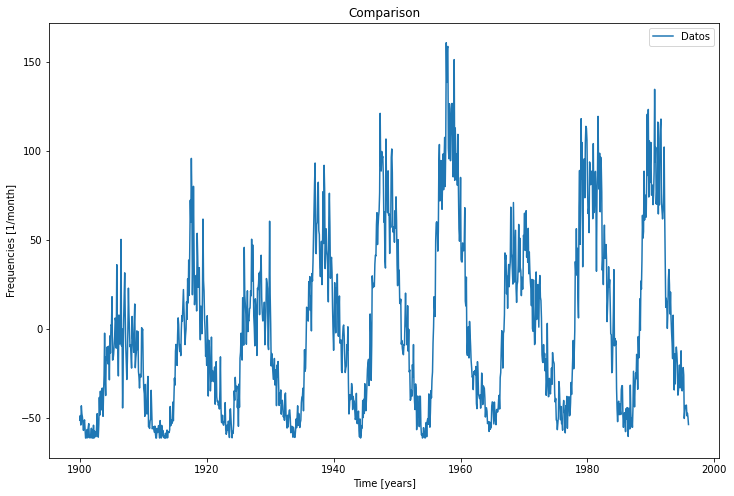

In [18]:
# Primero importamos nuestros datos de interés, los filtramos de acuerdo al enunciado y graficamos

file = 'data/ManchasSolares.dat'
rawData = np.loadtxt(file, dtype='float')

Data = []
for i in rawData:
    if i[0] >= 1900:
        Data.append(np.array(i))
        
Data = np.array(Data)

ManchasTotales = Data[:,3]
TiempoTotal = Data[:,0]+(Data[:,1]-1.0)/12.0

NManchas = ManchasTotales-np.mean(ManchasTotales)
Tiempo = TiempoTotal

fig = plt.figure(figsize =  (12, 8))
ax = plt.axes()
ax.set_xlabel("Time [years]")
ax.set_ylabel("Frequencies [1/month]")
ax.set_title("Comparison")
plt.plot(Tiempo, NManchas, label="Datos")
ax.legend()
plt.show()

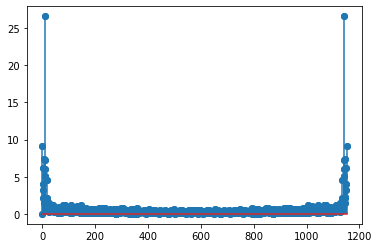

In [19]:
# Ahora realizamos una FFT para pasar al espacio de frecuencias

N = len(NManchas)
FFT = np.fft.fft(NManchas)
Frecuencias = np.fft.fftfreq(N, 1)
FFTA = np.abs(FFT)
plt.scatter(np.arange(N), np.abs(FFT/N))
plt.stem(np.arange(N), np.abs(FFT/N))
plt.show()

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

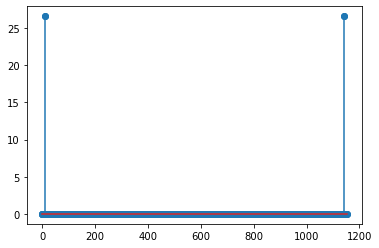

In [20]:
# Encontramos la frecuencia dominante de los datos

ii = np.argmax(FFTA)
ii_A = np.abs(Frecuencias) > (Frecuencias[ii])
ii_B = np.abs(Frecuencias) < (Frecuencias[ii])
FFT[ii_A | ii_B ] = 0

MiFrec = Frecuencias[ii]
periodo = 1/(12*MiFrec)
display(Latex(r'$Valor \; frecuencia \; dominante\;  [1/mes]: '+ str(MiFrec)+'$'))
display(Latex(r'$Valor \; periodo \; [años]: '+ str(periodo)+'$'))

# Graficamos las frecuencias filtradas

plt.scatter(np.arange(N), np.abs(FFT/N))
plt.stem(np.arange(N), np.abs(FFT/N))
plt.show()

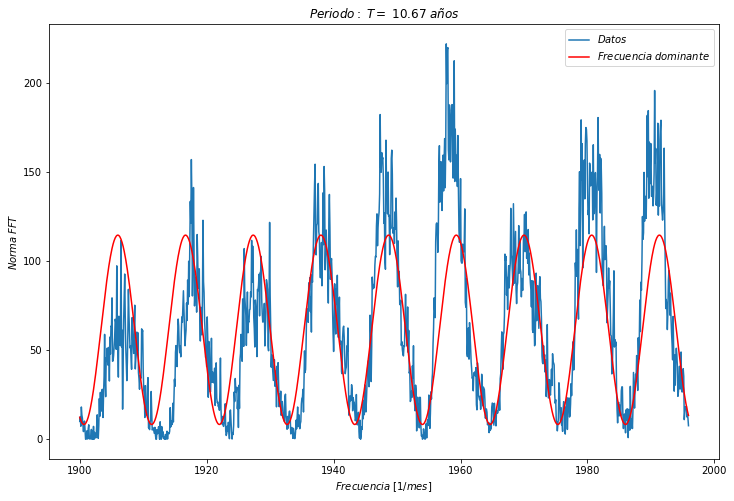

In [21]:
# Realizamos una IFFT para graficar nuevamente los datos adicionando la gráfica de la frecuencia dominante

NewManchas = np.fft.ifft(FFT)
NewManchas = NewManchas + np.mean(ManchasTotales)

fig = plt.figure(figsize =  (12, 8))
ax = plt.axes()
ax.set_xlabel("$ Frecuencia \; [1/mes]$")
ax.set_ylabel("$Norma \; FFT$")
ax.set_title("$Periodo: \; T = \; {:.2f} \; años$".format(np.around(periodo, 5)))
plt.plot(Tiempo, ManchasTotales, label="$Datos$")
plt.plot(Tiempo, np.real(NewManchas), label="$Frecuencia \; dominante$ ", c = 'r')

ax.legend()
plt.show()

## 7. Redes Neuronales
**1.** Modifique el código sobre redes neuronales escrito en C++ para entrenar una red neuronal sencilla. La red neuronal debe comportarse como una compuerta XNOR.La red debe tener la topología más simple posible (un par de neuronas en un capa o dos neuronas endos capas) y entrenada usando solo números aleatorios.

In [8]:
# Primerod definimos las funciones correspondientes a la arquitectura de la red neuronal

sigm = ( lambda z: 1/(1+np.exp(-z)),
         lambda z: z*(1-z) )

class Layer():
    
    def __init__(self, NConnections, NNeurons, ActivationFunc):
        
        self.ActivationFunc = ActivationFunc
        
        # Inicializamos pesos y bias
        self.b = np.random.randn(1,NNeurons)
        #self.b = np.zeros( (1, NNeurons))
        
        #self.W = np.random.rand(NConnections,NNeurons)*2 -1.    
        self.W = np.random.randn(NConnections,NNeurons)
        
def Perceptron(Topology, ActivationFunc):
    
    NN = []
    for l, layer in enumerate(Topology[:-1]):
        NN.append(Layer(Topology[l],Topology[l+1],ActivationFunc[l+1]))
    
    return NN

#Nuestras funciones de costo y de entrenamiento 

Cost = (lambda Yp, Yr: np.mean((Yp-Yr)**2),
        lambda Yp, Yr: Yp-Yr)

def Predict(Perceptron, XTrain, train=True):
    
    # Guardamos la suma ponderada de cada capa y sus activaciones
    out = [(None,XTrain)]
    
    # Forward Propagation
    for l, layer in enumerate(Perceptron):

        z = np.dot(out[-1][1],Perceptron[l].W)+Perceptron[l].b
        a = Perceptron[l].ActivationFunc[0](z)
        
        out.append((z,a))
        
    if train:
        return out
    else:
        return out[-1][1]
    
def Train(Perceptron,XTrain,YTrain,Cost,gamma):
    
    delta = []
    
    # Forward Pass
    out = Predict(Perceptron,XTrain)
    # Recordar que la primera capa no esta en out
    # usar l+1 si arranca en cero
    
    # For loop hacia atras
    # Backward pass
    for l in reversed(range(0,len(Perceptron))):
        
        z = out[l+1][0] # Salidas hacia atras de las sumas
        a = out[l+1][1] # Salidas hacia atras de las activaciones
        
        # Error en la ultima capa
        if l == len(Perceptron) -1:
            # Derivada del Costo en a
            # Derivada de la activacion en a
            delta.insert(0,Cost[1](a,YTrain)*Perceptron[l].ActivationFunc[1](a))
        else:
            delta.insert(0, np.dot(delta[0],Wt.T)*Perceptron[l].ActivationFunc[1](a))
        
        Wt = Perceptron[l].W
        
        # Gradient Descent
        Perceptron[l].b -= gamma*np.mean(delta[0], axis=0, keepdims=True)
        Perceptron[l].W -= gamma*np.dot(out[l][1].T,delta[0])
         
    # Retornamos la rediccion de la ultima capa        
    return out[-1][1]

In [7]:
# Generamos nuestra red neuronal básica (inputFeatures, NeuronsInHiddenLayer, OutputFeatures) = (2,2,1)
# Definimos los valores de input y otuput deseados correspondientes a la tabla de verdad de una compuerta XNOR

XTrain = np.array([[0,0],[0,1],[1,0],[1,1]])
YTrain = np.array([[1.],[0.],[0.],[1]])

MyTopology = [2, 2, 1]
Activations = [sigm, sigm, sigm]
Cortana = Perceptron(MyTopology, Activations)

Epochs = int(1e5)
LoosF, LoosFT = [], []

for e in range(Epochs):
    
    Yp = Train(Cortana, XTrain, YTrain, Cost,0.02)
    YpT = Predict(Cortana, XTrain, False) 
    LoosF.append(Cost[0](Yp,YTrain))
    LoosFT.append(Cost[0](YpT,YTrain))

0
1


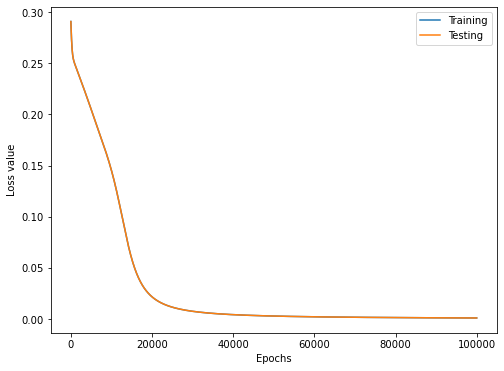

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [9]:
# Gráficamos la evolución del entrenamiento y la predicción de la red neuronal
fig = plt.figure(figsize=(8,6))

plt.plot(range(len(LoosF)),LoosF,label='Training')
plt.plot(range(len(LoosFT)),LoosFT,label='Testing')
plt.xlabel("Epochs")
plt.ylabel("Loss value")
plt.legend(loc=0)

plt.show()

# Verificamos la salida de nuestra red neuronal entrenada

MyTrain = np.array([[1,0],[1,1],[0,0],[0,1]]) 
Prediction = Predict(Cortana, MyTrain, False)

Prediction =np.around(Prediction[:,0], 5)

display(Latex(r'$Input:  ['+ str(MyTrain[0]) +', '+ str(MyTrain[1])+', '+str(MyTrain[2])+', '+str(MyTrain[3])+']$'))
display(Latex(r'$Output: ['+ str(Prediction[0]) +', '+ str(Prediction[1])+', '+str(Prediction[2])+', '+str(Prediction[3])+']$'))
Prediction =np.around(Prediction, 1)
display(Latex(r'$Approx \; output: ['+ str(Prediction[0]) +', '+ str(Prediction[1])+', '+str(Prediction[2])+', '+str(Prediction[3])+']$'))